In [1]:
!apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
!tar -xvf spark-2.4.0-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.0-bin-hadoop2.7"
import findspark
findspark.init()
# this code has to be in the first line

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 https://cloud.r-project.org/bin/linux/ubuntu bi

In [2]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)
# this code has to be in the second line

Mounted at /content/gdrive


In [3]:
%cd '/content/gdrive/My Drive/LDS9_K273_ONLINE_BuiThiHuong/Chapter4/'

/content/gdrive/My Drive/LDS9_K273_ONLINE_BuiThiHuong/Chapter4


In [4]:
import pyspark

In [5]:
from pyspark import SparkContext
from pyspark.conf import SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

In [6]:
sc =SparkContext()

In [7]:
spark = SparkSession(sc)

https://spark.apache.org/docs/2.1.0/api/python/pyspark.sql.html#module-pyspark.sql.functions


Dùng SQLContext

In [89]:
from pyspark.sql import Row, SQLContext

In [90]:
sqlContext = SQLContext(sc)

In [91]:
lst = [('John',10),('Lyna',9),('Samatha',8),('Tony',10)]

In [92]:
rdd = sc.parallelize(lst)

In [93]:
people = rdd.map(lambda x: Row(name=x[0], marks=int(x[1])))

In [94]:
schemaPeople = sqlContext.createDataFrame(people)

In [95]:
schemaPeople

DataFrame[marks: bigint, name: string]

In [96]:
schemaPeople.show()

+-----+-------+
|marks|   name|
+-----+-------+
|   10|   John|
|    9|   Lyna|
|    8|Samatha|
|   10|   Tony|
+-----+-------+



Dùng SparkSession

In [97]:
spark = SparkSession(sc)

In [98]:
schemaPeople_1 = spark.createDataFrame(people)

In [99]:
schemaPeople_1

DataFrame[marks: bigint, name: string]

In [100]:
schemaPeople_1.show()

+-----+-------+
|marks|   name|
+-----+-------+
|   10|   John|
|    9|   Lyna|
|    8|Samatha|
|   10|   Tony|
+-----+-------+



HDFS csv file

In [101]:
file_name = 'hdfs://bigdata.laptrinhpython.net:19000/people.csv'

In [102]:
people = spark.read.csv(file_name, inferSchema=True, header=True)
people.show(5)
# inferSchema: bat buoc, de tu suy kieu du lieu

+---+---------+--------------+------+-------------+
|_c0|person_id|          name|   sex|date of birth|
+---+---------+--------------+------+-------------+
|  0|      100|Penelope Lewis|female|   1990-08-31|
|  1|      101| David Anthony|  male|   1971-10-14|
|  2|      102|     Ida Shipp|female|   1962-05-24|
|  3|      103|  Joanna Moore|female|   2017-03-10|
|  4|      104|Lisandra Ortiz|female|   2020-08-05|
+---+---------+--------------+------+-------------+
only showing top 5 rows



HDFS json file

In [103]:
file_name = 'hdfs://bigdata.laptrinhpython.net:19000/data.json'

In [104]:
data = spark.read.json(file_name)
data.show(3)

+----------+--------------------+-------------+--------------------+--------------------+-------------------+
|        id|            location|sampling_rate|              sensor|    sensordatavalues|          timestamp|
+----------+--------------------+-------------+--------------------+--------------------+-------------------+
|5810744647|[112.6, FR, 0, 11...|         null|[22349, 1, [14, N...|[[12340422762, 1....|2019-12-20 03:22:01|
|5810744646|[35.2, DE, 0, 107...|         null|[21149, 7, [9, va...|[[12340422760, 9....|2019-12-20 03:22:01|
|5810744645|[51.0, DE, 0, 293...|         null|[5811, 1, [14, No...|[[12340422757, 6....|2019-12-20 03:22:01|
+----------+--------------------+-------------+--------------------+--------------------+-------------------+
only showing top 3 rows



## Thao tác trên DataFame

Xem kiểu dữ liệu

In [105]:
df = spark.read.csv('Obesity_data.csv', inferSchema=True, header=True)

In [106]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- height: integer (nullable = true)
 |-- weight: integer (nullable = true)
 |-- bmi: double (nullable = true)
 |-- age: integer (nullable = true)
 |-- bmc: integer (nullable = true)
 |-- bmd: double (nullable = true)
 |-- fat: integer (nullable = true)
 |-- lean: integer (nullable = true)
 |-- pcfat: double (nullable = true)



show(), count(), describle()

In [107]:
df.show(5)

+---+------+------+------+----+---+----+----+-----+-----+-----+
| id|gender|height|weight| bmi|age| bmc| bmd|  fat| lean|pcfat|
+---+------+------+------+----+---+----+----+-----+-----+-----+
|  1|     F|   150|    49|21.8| 53|1312|0.88|17802|28600| 37.3|
|  2|     M|   165|    52|19.1| 65|1309|0.84| 8381|40229| 16.8|
|  3|     F|   157|    57|23.1| 64|1230|0.84|19221|36057| 34.0|
|  4|     F|   156|    53|21.8| 56|1171| 0.8|17472|33094| 33.8|
|  5|     M|   160|    51|19.9| 54|1681|0.98| 7336|40621| 14.8|
+---+------+------+------+----+---+----+----+-----+-----+-----+
only showing top 5 rows



In [108]:
df.count()

1217

In [109]:
df.describe().show()

+-------+-----------------+------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+
|summary|               id|gender|            height|           weight|               bmi|              age|               bmc|               bmd|               fat|             lean|             pcfat|
+-------+-----------------+------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+
|  count|             1217|  1217|              1217|             1217|              1217|             1217|              1217|              1217|              1217|             1217|              1217|
|   mean| 614.518488085456|  null| 156.7239112571898|55.14379622021364| 22.39539852095314|47.15201314708299|1724.9145439605588|1.0087428101889888|17288.436318816763| 35463.1133935908|31.60

In [110]:
df.describe().show(vertical=True)

-RECORD 0---------------------
 summary | count              
 id      | 1217               
 gender  | 1217               
 height  | 1217               
 weight  | 1217               
 bmi     | 1217               
 age     | 1217               
 bmc     | 1217               
 bmd     | 1217               
 fat     | 1217               
 lean    | 1217               
 pcfat   | 1217               
-RECORD 1---------------------
 summary | mean               
 id      | 614.518488085456   
 gender  | null               
 height  | 156.7239112571898  
 weight  | 55.14379622021364  
 bmi     | 22.39539852095314  
 age     | 47.15201314708299  
 bmc     | 1724.9145439605588 
 bmd     | 1.0087428101889888 
 fat     | 17288.436318816763 
 lean    | 35463.1133935908   
 pcfat   | 31.604785903401805 
-RECORD 2---------------------
 summary | stddev             
 id      | 354.4705719473191  
 gender  | null               
 height  | 7.9777256820417035 
 weight  | 9.404988688010084  
 bmi    

In [111]:
df.describe("height", "weight").show()

+-------+------------------+-----------------+
|summary|            height|           weight|
+-------+------------------+-----------------+
|  count|              1217|             1217|
|   mean| 156.7239112571898|55.14379622021364|
| stddev|7.9777256820417035|9.404988688010084|
|    min|               136|               34|
|    max|               185|               95|
+-------+------------------+-----------------+



select()

In [112]:
df_sub = df.select("id", "gender", "height", "weight")
df_sub.show(5)

+---+------+------+------+
| id|gender|height|weight|
+---+------+------+------+
|  1|     F|   150|    49|
|  2|     M|   165|    52|
|  3|     F|   157|    57|
|  4|     F|   156|    53|
|  5|     M|   160|    51|
+---+------+------+------+
only showing top 5 rows



crosstab()

In [113]:
df_sub.crosstab("height", "gender").show(10)

+-------------+---+---+
|height_gender|  F|  M|
+-------------+---+---+
|          138|  2|  0|
|          170|  1| 24|
|          142| 11|  0|
|          153| 73|  1|
|          174|  0|  2|
|          185|  0|  1|
|          157| 31|  5|
|          152| 54|  2|
|          164| 11| 17|
|          179|  0|  1|
+-------------+---+---+
only showing top 10 rows



groupby()

In [114]:
df_sub.groupby("gender").mean("weight").show()

+------+-----------------+
|gender|      avg(weight)|
+------+-----------------+
|     F|52.31090487238979|
|     M|62.02253521126761|
+------+-----------------+



In [115]:
df_sub.groupby("gender").count().show()

+------+-----+
|gender|count|
+------+-----+
|     F|  862|
|     M|  355|
+------+-----+



In [116]:
df_sub.groupby("gender").agg({"weight": 'mean'}).show()

+------+-----------------+
|gender|      avg(weight)|
+------+-----------------+
|     F|52.31090487238979|
|     M|62.02253521126761|
+------+-----------------+



In [117]:
df_sub.groupby("gender").agg({"weight": "min", "height": "min"}).show()

+------+-----------+-----------+
|gender|min(weight)|min(height)|
+------+-----------+-----------+
|     F|         34|        136|
|     M|         38|        146|
+------+-----------+-----------+



distinct()

In [118]:
df_sub.select('gender').distinct().show()

+------+
|gender|
+------+
|     F|
|     M|
+------+



orderBy()

In [119]:
df.orderBy(df.age.desc()).show(3)

+---+------+------+------+----+---+----+----+-----+-----+-----+
| id|gender|height|weight| bmi|age| bmc| bmd|  fat| lean|pcfat|
+---+------+------+------+----+---+----+----+-----+-----+-----+
|963|     M|   158|    61|24.4| 88|1670|1.02|18038|39526| 30.5|
|712|     M|   161|    47|18.1| 87|1678|1.01|12328|32725| 26.4|
|588|     F|   142|    46|22.8| 85| 875|0.68|13946|31026| 30.4|
+---+------+------+------+----+---+----+----+-----+-----+-----+
only showing top 3 rows



In [120]:
df.orderBy(df.age.desc(), df.height.asc()).show(10)

+----+------+------+------+----+---+----+----+-----+-----+-----+
|  id|gender|height|weight| bmi|age| bmc| bmd|  fat| lean|pcfat|
+----+------+------+------+----+---+----+----+-----+-----+-----+
| 963|     M|   158|    61|24.4| 88|1670|1.02|18038|39526| 30.5|
| 712|     M|   161|    47|18.1| 87|1678|1.01|12328|32725| 26.4|
| 588|     F|   142|    46|22.8| 85| 875|0.68|13946|31026| 30.4|
|1203|     F|   152|    40|17.3| 85| 819|0.74|10903|25230| 29.5|
|1189|     M|   168|    64|22.7| 85|2292|1.23|16478|42085| 27.1|
|1167|     F|   148|    57|26.0| 84|1583|0.99|21002|35060| 36.4|
| 765|     F|   153|    62|26.5| 84|1397|0.87|23407|36596| 38.1|
|  14|     M|   158|    57|22.8| 84|1772|1.02|13398|40313| 24.1|
| 360|     M|   158|    58|23.2| 84|1891|1.06|15590|38924| 27.6|
| 816|     M|   162|    59|22.5| 84|2370|1.22|15149|39330| 26.6|
+----+------+------+------+----+---+----+----+-----+-----+-----+
only showing top 10 rows



withColumn()

In [121]:
df_sub = df_sub.withColumn('bmi', (df_sub.weight/((df_sub.height)/100)**2))
df_sub.show(3)

+---+------+------+------+------------------+
| id|gender|height|weight|               bmi|
+---+------+------+------+------------------+
|  1|     F|   150|    49| 21.77777777777778|
|  2|     M|   165|    52|19.100091827364558|
|  3|     F|   157|    57|23.124670372023203|
+---+------+------+------+------------------+
only showing top 3 rows



withColumnRenamed()

In [122]:
df_sub.withColumnRenamed('gender', 'sex').show(3)

+---+---+------+------+------------------+
| id|sex|height|weight|               bmi|
+---+---+------+------+------------------+
|  1|  F|   150|    49| 21.77777777777778|
|  2|  M|   165|    52|19.100091827364558|
|  3|  F|   157|    57|23.124670372023203|
+---+---+------+------+------------------+
only showing top 3 rows



drop()

In [123]:
df.columns

['id',
 'gender',
 'height',
 'weight',
 'bmi',
 'age',
 'bmc',
 'bmd',
 'fat',
 'lean',
 'pcfat']

In [124]:
df.drop('bmi', 'lean').columns

['id', 'gender', 'height', 'weight', 'age', 'bmc', 'bmd', 'fat', 'pcfat']

dropDuplicates()

In [125]:
people.count()

100000

In [126]:
people.dropDuplicates().count()

100000

dropna()

In [127]:
people.count()

100000

In [128]:
people.dropna().count()

98080

filter(), where()

In [129]:
people_sub = people.filter(people.name.like('I%p'))
people_sub.count()

7

In [130]:
people_sub.show()

+-----+---------+-------------+------+-------------+
|  _c0|person_id|         name|   sex|date of birth|
+-----+---------+-------------+------+-------------+
|    2|      102|    Ida Shipp|female|   1962-05-24|
| 5791|     5891| Isaias Stepp|  male|   1974-04-13|
| 9965|    10065| Isabel Sharp|female|   1967-11-28|
|58576|    58676|Isadora Tripp|female|   1971-06-05|
|68125|    68225|   Irene Kulp|female|   1986-07-06|
|71572|    71672|    Ivan Ropp|  male|   1975-07-08|
|92061|    92161|   Inez Estep|female|   1925-09-03|
+-----+---------+-------------+------+-------------+



In [131]:
# Return rows where name contains 'Moore'
people_Moore = people.where(people.name.contains('Moore'))
people_Moore.count()

352

In [132]:
# Return rows where name doesn;t contains 'Moore'
people_not_Moore = people.where(~people.name.contains('Moore'))
people_not_Moore.count()

99648

In [133]:
people_1999 = people.filter((people['date of birth'] >= '1999-01-01') & (people['date of birth'] <= '1999-12-31'))

In [134]:
people_1999.count()

1366

In [135]:
people_1999 = people.where((people['date of birth'] >= '1999-01-01') & (people['date of birth'] <= '1999-12-31'))

In [136]:
people_1999.count()

1366

column string transformation

In [137]:
# from pyspark.sql.functions import *

In [138]:
people.withColumn('upper_name', upper(col('name'))).show(3)

+---+---------+--------------+------+-------------+--------------+
|_c0|person_id|          name|   sex|date of birth|    upper_name|
+---+---------+--------------+------+-------------+--------------+
|  0|      100|Penelope Lewis|female|   1990-08-31|PENELOPE LEWIS|
|  1|      101| David Anthony|  male|   1971-10-14| DAVID ANTHONY|
|  2|      102|     Ida Shipp|female|   1962-05-24|     IDA SHIPP|
+---+---------+--------------+------+-------------+--------------+
only showing top 3 rows



types

In [139]:
from pyspark.sql.types import *

In [140]:
people.withColumn('year', substring('date of birth', pos=0, len=4)).show(3)

+---+---------+--------------+------+-------------+----+
|_c0|person_id|          name|   sex|date of birth|year|
+---+---------+--------------+------+-------------+----+
|  0|      100|Penelope Lewis|female|   1990-08-31|1990|
|  1|      101| David Anthony|  male|   1971-10-14|1971|
|  2|      102|     Ida Shipp|female|   1962-05-24|1962|
+---+---------+--------------+------+-------------+----+
only showing top 3 rows



In [141]:
people.withColumn('year', substring('date of birth', pos=0, len=4).cast(IntegerType())).show(3)

+---+---------+--------------+------+-------------+----+
|_c0|person_id|          name|   sex|date of birth|year|
+---+---------+--------------+------+-------------+----+
|  0|      100|Penelope Lewis|female|   1990-08-31|1990|
|  1|      101| David Anthony|  male|   1971-10-14|1971|
|  2|      102|     Ida Shipp|female|   1962-05-24|1962|
+---+---------+--------------+------+-------------+----+
only showing top 3 rows



In [142]:
people = people.withColumn('year', substring('date of birth', pos=0, len=4).cast(IntegerType()))

In [143]:
people.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- person_id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- date of birth: string (nullable = true)
 |-- year: integer (nullable = true)



conditional clause

In [151]:
df.select(df.height, when(df.height <= 150, 'Short')).show(5)

+------+----------------------------------------+
|height|CASE WHEN (height <= 150) THEN Short END|
+------+----------------------------------------+
|   150|                                   Short|
|   165|                                    null|
|   157|                                    null|
|   156|                                    null|
|   160|                                    null|
+------+----------------------------------------+
only showing top 5 rows



In [152]:
df.select(df.height, when(df.height <= 150, 'Short').alias('Type')).show(5)

+------+-----+
|height| Type|
+------+-----+
|   150|Short|
|   165| null|
|   157| null|
|   156| null|
|   160| null|
+------+-----+
only showing top 5 rows



In [153]:
df.select(df.height,
          when(df.height <= 150, 'Show')
          .when(df.height <= 160, 'Midium')).show(3)

+------+------------------------------------------------------------------------+
|height|CASE WHEN (height <= 150) THEN Show WHEN (height <= 160) THEN Midium END|
+------+------------------------------------------------------------------------+
|   150|                                                                    Show|
|   165|                                                                    null|
|   157|                                                                  Midium|
+------+------------------------------------------------------------------------+
only showing top 3 rows



In [154]:
df.select(df.height,
          when(df.height <= 150, 'Show')
          .when(df.height <= 160, 'Midium')
          .alias('Type')).show(3)

+------+------+
|height|  Type|
+------+------+
|   150|  Show|
|   165|  null|
|   157|Midium|
+------+------+
only showing top 3 rows



In [155]:
df.select(df.height,
          when(df.height <= 150, 'Short')
          .when(df.height <= 160, 'Midium')
          .otherwise('Tall')).show(3)

+------+-----------------------------------------------------------------------------------+
|height|CASE WHEN (height <= 150) THEN Short WHEN (height <= 160) THEN Midium ELSE Tall END|
+------+-----------------------------------------------------------------------------------+
|   150|                                                                              Short|
|   165|                                                                               Tall|
|   157|                                                                             Midium|
+------+-----------------------------------------------------------------------------------+
only showing top 3 rows



In [156]:
df.select(df.height,
          when(df.height <= 150, 'Short')
          .when(df.height <= 160, 'Midium')
          .otherwise('Tall')
          .alias('Type')).show(3)

+------+------+
|height|  Type|
+------+------+
|   150| Short|
|   165|  Tall|
|   157|Midium|
+------+------+
only showing top 3 rows



User defined functions - UDFs

In [157]:
from pyspark.sql.functions import udf

In [158]:
def bmi_type(bmi):
  bmi_type = ''
  if bmi <= 18.5:
    bmi_type = 'Underweight'
  elif bmi <= 24.9:
    bmi_type = 'Normal weight'
  elif bmi <= 29.9:
    bmi_type = 'Overweight'
  else:
    bmi_type = 'Obesity'
  return bmi_type

In [159]:
udfBMI = udf(bmi_type, StringType())

In [171]:
df_sub.withColumn('bmi_type', udfBMI(df_sub.bmi)).show(3)

+---+------+------+------+------------------+-------------+
| id|gender|height|weight|               bmi|     bmi_type|
+---+------+------+------+------------------+-------------+
|  1|     F|   150|    49| 21.77777777777778|Normal weight|
|  2|     M|   165|    52|19.100091827364558|Normal weight|
|  3|     F|   157|    57|23.124670372023203|Normal weight|
+---+------+------+------+------------------+-------------+
only showing top 3 rows



In [178]:
df_sub.withColumn('bmi_type_2',
              when(df_sub.bmi <= 18.5, 'Underweight')
              .when(df_sub.bmi <= 24.9, 'Normal weight')
              .when(df_sub.bmi <= 29.9, 'Overweight')
              .otherwise('Obesity')).show(3)

+---+------+------+------+------------------+-------------+
| id|gender|height|weight|               bmi|   bmi_type_2|
+---+------+------+------+------------------+-------------+
|  1|     F|   150|    49| 21.77777777777778|Normal weight|
|  2|     M|   165|    52|19.100091827364558|Normal weight|
|  3|     F|   157|    57|23.124670372023203|Normal weight|
+---+------+------+------+------------------+-------------+
only showing top 3 rows



visualization: chuyển dữ liệu sang Pandas để trực quan. Do Big data không hỗ trợ

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
# check the column names of df_sub
print('The column names of df_sub are:', df_sub.columns)
# convert to Pandas DataFrame
df_pandas = df_sub.toPandas()

The column names of df_sub are: ['id', 'gender', 'height', 'weight', 'bmi']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


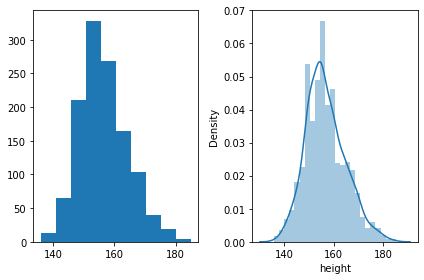

In [183]:
# create a histogram
plt.subplot(1,2,1)
plt.hist(df_pandas['height'])
plt.subplot(1,2,2)
sns.distplot(df_pandas['height'])
plt.tight_layout()
plt.show()

## Thao tác trên SQL

In [187]:
people.count()

100000

create temporary table

In [186]:
# create a temporary table 'people_df'
people.createOrReplaceTempView('people_df')

select()

In [189]:
# construct a query to select the names of the people
# from the temporary table 'people_df'
query = 'select name from people_df'

# assign the result of Spark's query to people_df_names
people_df_names = spark.sql(query)

# print the top 10 names of the people
people_df_names.show(10)

+----------------+
|            name|
+----------------+
|  Penelope Lewis|
|   David Anthony|
|       Ida Shipp|
|    Joanna Moore|
|  Lisandra Ortiz|
|   David Simmons|
|   Edward Hudson|
|    Albert Jones|
|Leonard Cavender|
|  Everett Vadala|
+----------------+
only showing top 10 rows



when()

In [194]:
# filter the people table to select female sex
people_female_df = spark.sql('select * from people_df where sex == "female"')

# filter the people table DataFrame to select male sex
people_male_df = spark.sql('select * from people_df where sex == "male"')
# people_male_df = spark.sql('select * from people_df where sex != "female"')

print(people_female_df.count())
print(people_male_df.count())

49014
49066


like()

In [196]:
people_Vadala = spark.sql('select * from people_df where name like "%Vadala"')
people_Vadala.show()

+-----+---------+--------------+------+-------------+----+
|  _c0|person_id|          name|   sex|date of birth|year|
+-----+---------+--------------+------+-------------+----+
|    9|      109|Everett Vadala|  male|   2005-05-24|2005|
|77207|    77307| Marlyn Vadala|female|   1992-07-02|1992|
+-----+---------+--------------+------+-------------+----+



substring()

In [198]:
name_sub = spark.sql('select substring(name,8,10) from people_df where name like "Albert%"')
name_sub.show(10)

+----------------------+
|substring(name, 8, 10)|
+----------------------+
|                 Jones|
|              Guillory|
|                Miller|
|                 Goetz|
|                Clever|
|               Griffin|
|              Amundsen|
|             Pritchard|
|                Omeara|
|            Villarreal|
+----------------------+
only showing top 10 rows



In [206]:
name_sub = spark.sql('select substring(name,8,10) as name_2 from people_df where name like "Albert%"')
name_sub.show(10)

+----------+
|    name_2|
+----------+
|     Jones|
|  Guillory|
|    Miller|
|     Goetz|
|    Clever|
|   Griffin|
|  Amundsen|
| Pritchard|
|    Omeara|
|Villarreal|
+----------+
only showing top 10 rows



In [208]:
# compare 1
people.select('name').show(5)

+--------------+
|          name|
+--------------+
|Penelope Lewis|
| David Anthony|
|     Ida Shipp|
|  Joanna Moore|
|Lisandra Ortiz|
+--------------+
only showing top 5 rows



In [209]:
# compare 1
spark.sql('select name from people_df').show(5)

+--------------+
|          name|
+--------------+
|Penelope Lewis|
| David Anthony|
|     Ida Shipp|
|  Joanna Moore|
|Lisandra Ortiz|
+--------------+
only showing top 5 rows



In [211]:
# compare 2
people_female_df = spark.sql('select * from people_df where sex == "female"')
people_female_df.count()

49014

In [212]:
# compare 2
people_female_df_1 = people.where(people.sex == 'female')
people_female_df_1.count()

49014

In [213]:
# compare 3
people_Vadala = spark.sql('select * from people_df where name like "%Vadala"')
people_Vadala.show()

+-----+---------+--------------+------+-------------+----+
|  _c0|person_id|          name|   sex|date of birth|year|
+-----+---------+--------------+------+-------------+----+
|    9|      109|Everett Vadala|  male|   2005-05-24|2005|
|77207|    77307| Marlyn Vadala|female|   1992-07-02|1992|
+-----+---------+--------------+------+-------------+----+



In [215]:
# compare 3
people_Vadala_1 = people.where(people.name.like('%Vadala'))
people_Vadala_1.show()

+-----+---------+--------------+------+-------------+----+
|  _c0|person_id|          name|   sex|date of birth|year|
+-----+---------+--------------+------+-------------+----+
|    9|      109|Everett Vadala|  male|   2005-05-24|2005|
|77207|    77307| Marlyn Vadala|female|   1992-07-02|1992|
+-----+---------+--------------+------+-------------+----+



In [217]:
# compare 4
people_Albert = spark.sql('select * from people_df where name like "Albert%"')
people_Albert.count()

234

In [236]:
# compare 4
people_Albert_1 = people.where(people.name.startswith('Albert'))
people_Albert_1

DataFrame[_c0: int, person_id: int, name: string, sex: string, date of birth: string, year: int]

substring

In [230]:
# compare 5
name_sub = spark.sql('select substring(name,8,10) as name_2 from people_df where name like "Albert%"')
name_sub.show(5)

+--------+
|  name_2|
+--------+
|   Jones|
|Guillory|
|  Miller|
|   Goetz|
|  Clever|
+--------+
only showing top 5 rows



In [239]:
# compare 5
name_sub_1 = people.select(substring(people.name, pos=8, len=10).alias('name_2'))\
                    .where(people.name.like('Albert%'))
name_sub_1.show(5)

+--------+
|  name_2|
+--------+
|   Jones|
|Guillory|
|  Miller|
|   Goetz|
|  Clever|
+--------+
only showing top 5 rows



replace()

repartition()

In [235]:
people.repartition(10).rdd.getNumPartitions()

10

In [144]:
# Create an DataFrame from file_path
people_df = spark.read.csv("data/people.csv", header=True, inferSchema=True)

In [145]:
# Check the type of people_df
print("The type of people_df is", type(people_df))

The type of people_df is <class 'pyspark.sql.dataframe.DataFrame'>


In [146]:
people_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- person_id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- date of birth: string (nullable = true)



In [147]:
people_df.show(5)

+---+---------+--------------+------+-------------+
|_c0|person_id|          name|   sex|date of birth|
+---+---------+--------------+------+-------------+
|  0|      100|Penelope Lewis|female|   1990-08-31|
|  1|      101| David Anthony|  male|   1971-10-14|
|  2|      102|     Ida Shipp|female|   1962-05-24|
|  3|      103|  Joanna Moore|female|   2017-03-10|
|  4|      104|Lisandra Ortiz|female|   2020-08-05|
+---+---------+--------------+------+-------------+
only showing top 5 rows



In [148]:
from pyspark.sql import types 
from pyspark.sql.functions import col, udf
from datetime import datetime

In [149]:
# Change column type
func =  udf (lambda x: datetime.strptime(x, '%Y-%m-%d'), types.DateType())
people_df = people_df.withColumn('DOB', func(col('date of birth')))
people_df.show()

+---+---------+-----------------+------+-------------+----------+
|_c0|person_id|             name|   sex|date of birth|       DOB|
+---+---------+-----------------+------+-------------+----------+
|  0|      100|   Penelope Lewis|female|   1990-08-31|1990-08-31|
|  1|      101|    David Anthony|  male|   1971-10-14|1971-10-14|
|  2|      102|        Ida Shipp|female|   1962-05-24|1962-05-24|
|  3|      103|     Joanna Moore|female|   2017-03-10|2017-03-10|
|  4|      104|   Lisandra Ortiz|female|   2020-08-05|2020-08-05|
|  5|      105|    David Simmons|  male|   1999-12-30|1999-12-30|
|  6|      106|    Edward Hudson|  male|   1983-05-09|1983-05-09|
|  7|      107|     Albert Jones|  male|   1990-09-13|1990-09-13|
|  8|      108| Leonard Cavender|  male|   1958-08-08|1958-08-08|
|  9|      109|   Everett Vadala|  male|   2005-05-24|2005-05-24|
| 10|      110| Freddie Claridge|  male|   2002-05-07|2002-05-07|
| 11|      111|Annabelle Rosseau|female|   1989-07-13|1989-07-13|
| 12|     

In [150]:
people_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- person_id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- date of birth: string (nullable = true)
 |-- DOB: date (nullable = true)

